In [2]:
#predicting whether an amazon review is positive or not
import pandas as pd
df=pd.read_csv('/content/amazon.csv')
df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [4]:
df['Positive'].value_counts()

1    15233
0     4767
Name: Positive, dtype: int64

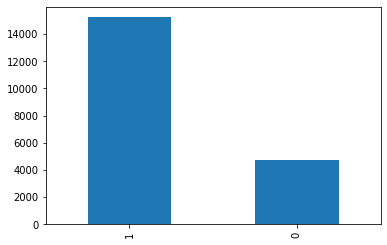

In [5]:
df['Positive'].value_counts().plot(kind='bar')

In [6]:
#dividing data inyo i/p and o/p
x=df.iloc[:,0].values
y=df.iloc[:,1].values

In [7]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [8]:
#Apply TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)#for training data it is vect.fit_transform
x_test_v = vect.transform(x_test)#for testing data ,it is vect.transform

In [9]:
#Apply CLASSIFIER(SVC)
from sklearn.svm import SVC
model = SVC()

In [10]:
#fitting the model
model.fit(x_train_v,y_train)


SVC()

In [11]:
#Predictor variable
y_pred = model.predict(x_test_v)
y_pred # predicted values

array([1, 1, 1, ..., 1, 1, 1])

In [12]:
y_test # actual values

array([1, 1, 1, ..., 1, 1, 1])

In [13]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

91.22

In [14]:
a = df['reviewText'][19995]
a

'this app is fricken stupid.it froze on the kindle and it wont allow me to place most iteams just ignore the 5 * people their wrong on so many levels. the people who made this game so were you excidently press the wrong button you them your own money. jer'

In [15]:
a = vect.transform([a])
model.predict(a)

array([0])

In [16]:
#Pipelining
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [17]:
#predictor variable
y_pred1 = text_model.predict(x_test)
y_pred1

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
accuracy_score(y_pred1,y_test)*100

91.22

In [20]:
a1 = df['reviewText'][2]
a1

'this is a really cool game. there are a bunch of levels and you can find golden eggs. super fun.'

In [21]:
text_model.predict([a1])

array([1])

In [22]:
text_model.predict(['ver bad'])

array([0])

In [23]:
#Joblib has 2 types -  1.Dump and 2.Load
import joblib
joblib.dump(text_model,'amazon.csv')
#We are creating a new file called spam-ham,and we are dumping the pipelined model inside it

['amazon.csv']

In [24]:
#CREATE A WEB APP USING SREAMLIT

In [26]:
!pip install streamlit --quiet # Installing the streamlit library

In [27]:
%%writefile app.py
#%%writefile app.py is a magic command which creates a file named app.py
import streamlit as st
import joblib
model = joblib.load('amazon.csv')
st.title('REVIEW CLASSIFIER')# creates a title with name review classifier
ip = st.text_input('Enter the Message')#creates a text box
op = model.predict([ip])
if st.button('Predict'):
  st.title(op[0])#st.button will create a button with name predict
  #st.title(op[0]) - the output will be displayed as a title

Writing app.py


In [ ]:
#TEMPORARY DEPLOYMENT
!streamlit run app.py & npx localtunnel --port 8501
#8501 is the default port number for local tunnel

2022-08-15 11:28:30.916 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.193.118.189:8501

npx: installed 22 in 7.375s
your url is: https://slow-cases-talk-35-193-118-189.loca.lt
